## Inspired by Prof. John C. Hart presentation on MDS in CS 416 Data Visualization
## University of Illinois Urbana-Champaign

### We use the Multi-Dimensional Scaling package in sklearn
#### Ref: https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling

#### We are trying to place a bunch of US Cities on a low-dimensional 'map' - let's see if it resembles the actual location on a real geographical map, relative to each other. Note that the 'map' generation does NOT use the city's lat and long data.

##### Author: Aditya Wresniyandaka

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians, sqrt, atan2
from sklearn.manifold import MDS

In [2]:
## City list - lat and Long
cities = [
  {"id": "Nebraska", "x": -100.00000, "y": 41.500000},
  {"id": "New York", "x": -74.005974, "y": 40.712776},
  {"id": "Los Angeles", "x": -118.243685, "y": 34.052234},
  {"id": "Chicago", "x": -87.629798, "y": 41.878114},
  {"id": "Houston", "x": -95.369803, "y": 29.760427},
  {"id": "Phoenix", "x": -112.074037, "y": 33.448377},
  {"id": "Philadelphia", "x": -75.165222, "y": 39.952584},
  {"id": "San Antonio", "x": -98.493628, "y": 29.424122},
  {"id": "San Diego", "x": -117.161084, "y": 32.715738},
  {"id": "Dallas", "x": -96.796988, "y": 32.776664},
  {"id": "San Jose", "x": -121.886329, "y": 37.338208},
  {"id": "Austin", "x": -97.743061, "y": 30.267153},
  {"id": "Jacksonville", "x": -81.655651, "y": 30.332184},
  {"id": "San Francisco", "x": -122.431297, "y": 37.773972},
  {"id": "Minneapolis", "x":-93.258133, "y": 44.986656},
  {"id": "Seattle", "x":-122.335167, "y": 47.608013},
  {"id": "Denver", "x":-104.991531, "y": 39.742043} ,
  {"id": "Atlanta", "x":-84.386330, "y": 33.753746} 
]

### Calculate the distance between two cities using the Haversine formula and generate a distance matrix
#### Ref: https://www.igismap.com/haversine-formula-calculate-geographic-distance-earth/

In [3]:
def calculate_distance(city1, city2):

## City 1 and City 2 come from the cities[] above
## Choose km or miles for the Earth's radius

    earth_radius = 6371  # Earth radius in kilometers
    #earth_radius = 3959 # Earth radius in miles
    lat1 = radians(city1['y'])
    lat2 = radians(city2['y'])
    lon1 = radians(city1['x'])
    lon2 = radians(city2['x'])

    d_lat = lat2 - lat1
    d_lon = lon2 - lon1

    ## Law of Haversine
    a = sin(d_lat / 2) * sin(d_lat / 2) + cos(lat1) * cos(lat2) * sin(d_lon / 2) * sin(d_lon / 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))  ## atan2() returns arc tangent in radians
    d = earth_radius * c
    
    return d

In [4]:
# Create an empty distance matrix -- this is the high-dimension matrix
distance_matrix = [[0 for _ in range(len(cities))] for _ in range(len(cities))]

In [5]:
# Calculate distances and populate the matrix
for i in range(len(cities)):
  for j in range(i, len(cities)):  # Avoid redundant calculations  
    distance = calculate_distance(cities[i], cities[j])
    distance_matrix[i][j] = distance
    distance_matrix[j][i] = distance  # Fill the other half for symmetry

In [6]:
#distance_matrix

### Generate an MDS object with 2 dimensions

In [7]:
mds = MDS(n_components=2,dissimilarity='precomputed', normalized_stress='auto',random_state=80)

In [8]:
# Fit the MDS model to the distance matrix
estimated_distances = mds.fit_transform(distance_matrix)

In [9]:
# estimated_distances

### Generate a low-dimension plot

In [10]:
# Extract the X and Y coordinates
x = estimated_distances[:, 0]
y = estimated_distances[:, 1]

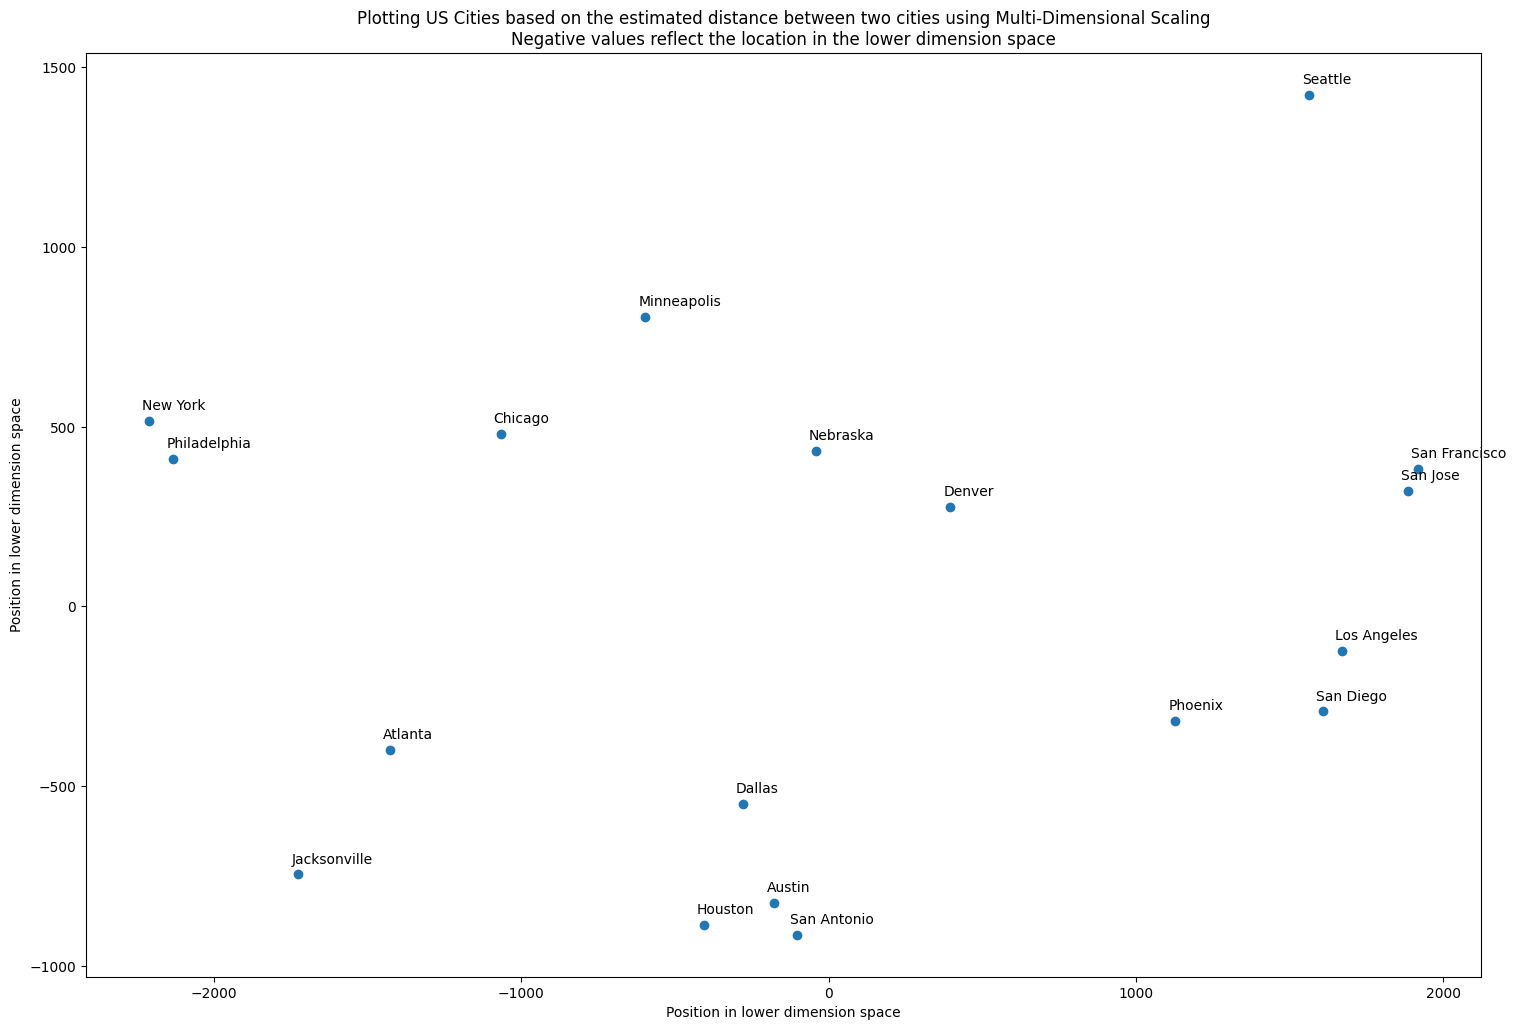

In [11]:
# Create the plot
plt.rcParams["figure.figsize"] = (18, 12)

plt.scatter(x, y)

plt.xlabel('Position in lower dimension space')
plt.ylabel('Position in lower dimension space')

# Add city names as annotation/labels; adjust the location with the xytext parameter
for i, city in enumerate(cities):
  plt.annotate(city['id'], (x[i], y[i]), xytext=(-5, 8), textcoords='offset points' )

plt.title('Plotting US Cities based on the estimated distance between two cities using Multi-Dimensional Scaling'+'\n'+
'Negative values reflect the location in the lower dimension space')
plt.show()

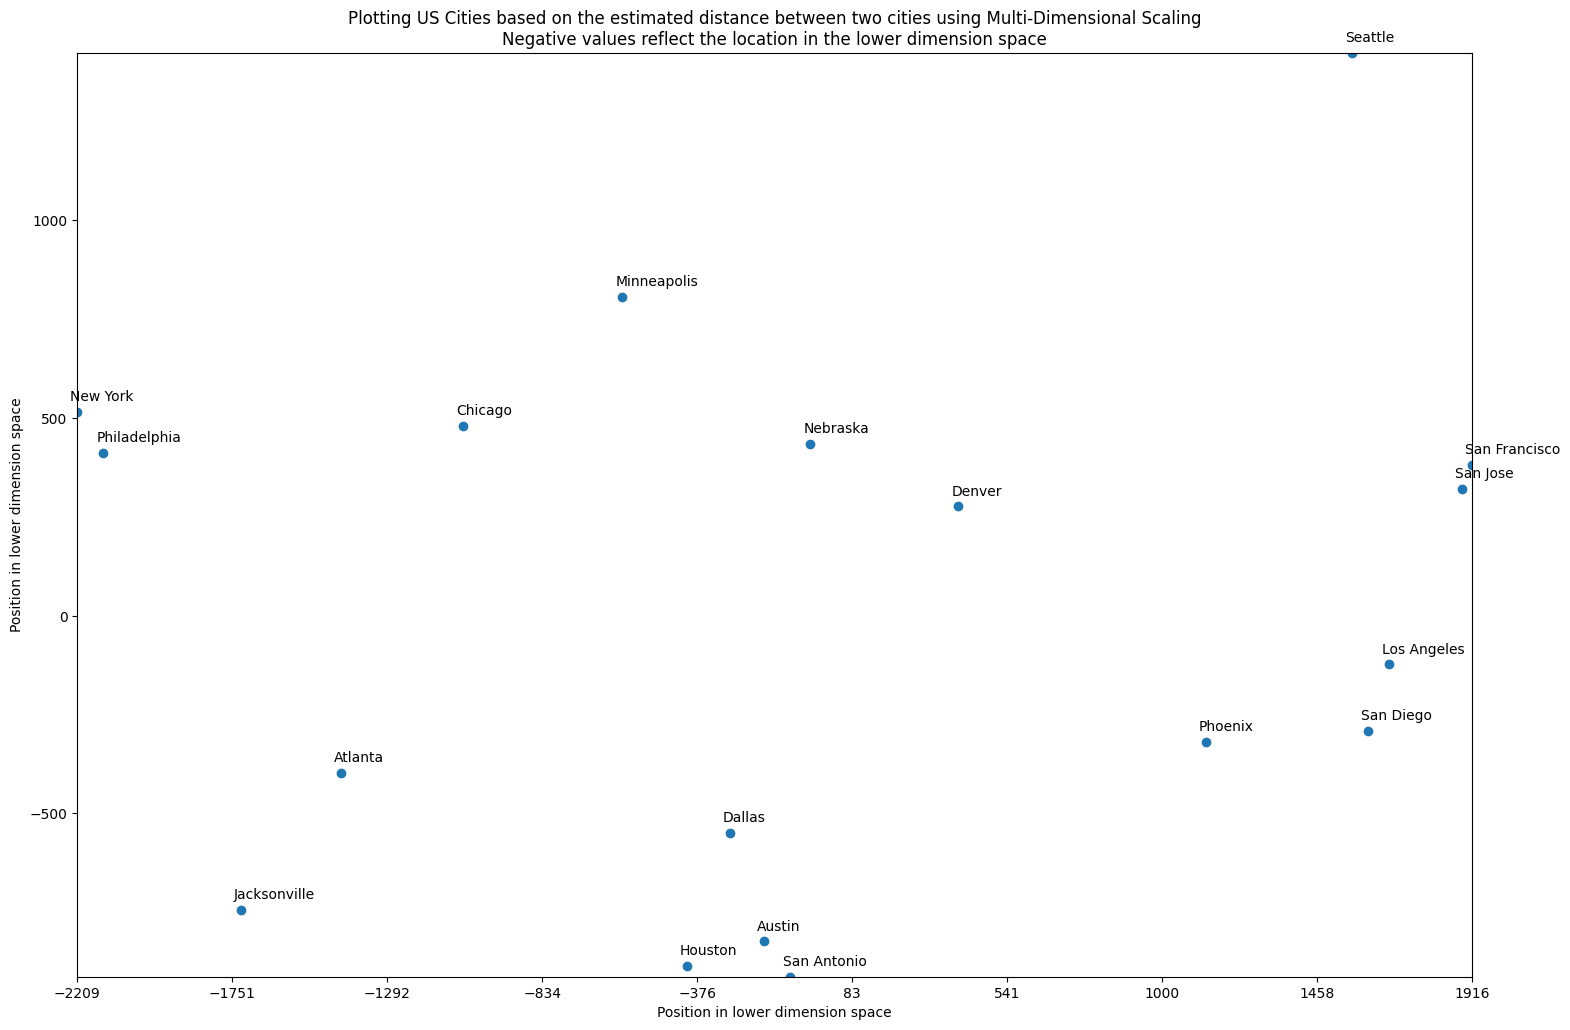

In [13]:
## If you prefer the axis to really span the min and max value
plt.scatter(x, y)
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))

#plt.xticks(range(int(min(x)), int(max(x)) + 1)) // inneffocient
#plt.yticks(range(int(min(y)), int(max(y)) + 1)) // inefficient

## More efficient
num_ticks = 10  # Adjust this as needed
ticks = np.linspace(min(x), max(x), num_ticks)
plt.xticks(ticks)

plt.xlabel('Position in lower dimension space')
plt.ylabel('Position in lower dimension space')

# Add city names as annotation/labels; adjust the location with the xytext parameter
for i, city in enumerate(cities):
  plt.annotate(city['id'], (x[i], y[i]), xytext=(-5, 8), textcoords='offset points' )

plt.title('Plotting US Cities based on the estimated distance between two cities using Multi-Dimensional Scaling'+'\n'+
'Negative values reflect the location in the lower dimension space')

plt.show()